In [91]:
#Proceso de importación de Referencias


# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asignamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear gráficas y mostrar las imágenes en pantalla

from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes
from skimage import color                # Paquete con las operaciones de transformaciones entre espacios de color
from skimage import exposure             # Paquete con las funciones para calcular y alterar el histograma
from skimage import filters              # Paquete que contiene las máscaras y filtros de suavizado y realzado
from skimage import util                 # Paquete que contiene las funciones para cambiar el tipo de dato de las imágenes
from skimage import morphology           # Para crear el kernel de convolución en los filtros no lienales
from skimage import transform            # Esta biblioteca es la que contiene la implementación de Hough
from skimage import measure              # Esta biblioteca contiene el método de etiquetado de regiones
from skimage import feature              # Esta biblioteca es la que contiene la implementación del canny

from scipy import ndimage                # Usamos esta biblioteca para realizar la operación de convolución
import skdemo                            # Paquete ESPECIAL ADJUNTO con algunas funciones extra de visualización
import os
###########################

from scipy.stats import kde              # Esta biblioteca es necesaria para estimar la función de densidad de los datos
from sklearn import preprocessing        # Este paquete contiene las funciones de preprocesamiento de datos
from sklearn import feature_selection    # Este paquete contiene los métodos de selección de características de sklearn
from sklearn import svm                  # Este paquete contiene las funciones de un clasificador SVM
from sklearn import model_selection      # Este paquete contiene las funciones de particionamiento de datos y validación cruzada
from sklearn import metrics              # Este paquete contiene las funciones para evaluar un clasificador

# Con este nos aseguramos que las imágenes en niveles de gris, se vean como tal siempre.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

In [92]:
sq = morphology.square(width=3)
dia = morphology.diamond(radius=1)
rd = morphology.disk(radius=4)

(<matplotlib.axes._subplots.AxesSubplot at 0x2023dc61710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2023dc8ac50>)

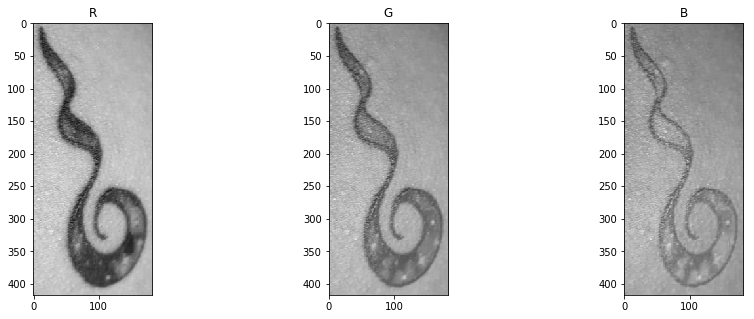

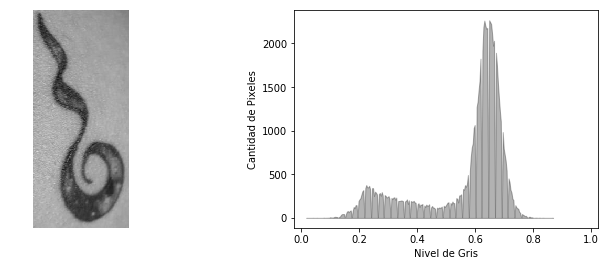

In [248]:
#Proceso individual de imagenes

img_orginal = skimage.img_as_float(io.imread("imagenes/vannesa/v10.jpg"))
skdemo.imshow_all(img_orginal[..., 0], img_orginal[..., 1], img_orginal[..., 2],
                 titles=['R', 'G', 'B'])


img_3 = img_orginal[..., 0].copy()
skdemo.imshow_with_histogram(img_3)

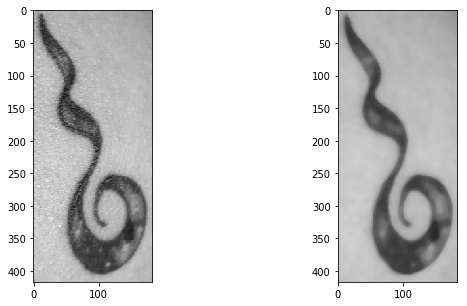

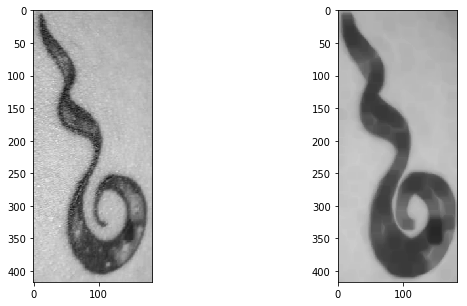

In [249]:
k = morphology.square(10)
img_median = filters.rank.median(img_3, k)
skdemo.imshow_all(img_3,img_median)
img_min = filters.rank.minimum(img_median, k)
skdemo.imshow_all(img_3,img_min)

(<matplotlib.axes._subplots.AxesSubplot at 0x20241d6fcf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20241d9bf98>)

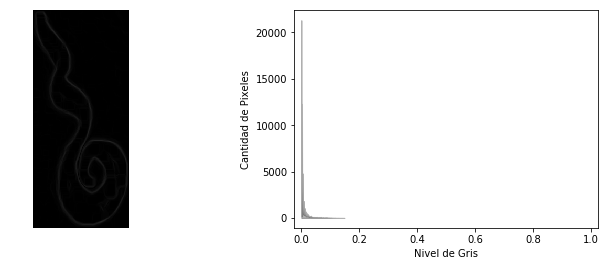

In [250]:
gradiente = filters.sobel(img_min)
imgfloat = skimage.img_as_float(gradiente)
skdemo.imshow_with_histogram(imgfloat)

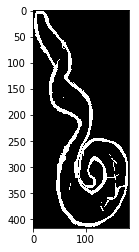

In [251]:
img_tatto = gradiente > 0.03
plt.imshow(img_tatto, cmap='gray')

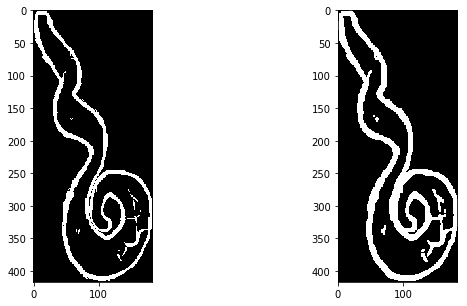

In [252]:
img_dilatada = morphology.dilation(img_tatto, sq)
skdemo.imshow_all(img_tatto, img_dilatada)
#img_tatto = img_dilatada

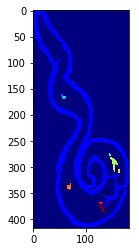

In [253]:
etiqueta = measure.label(img_dilatada)
plt.imshow(etiqueta, cmap="jet")

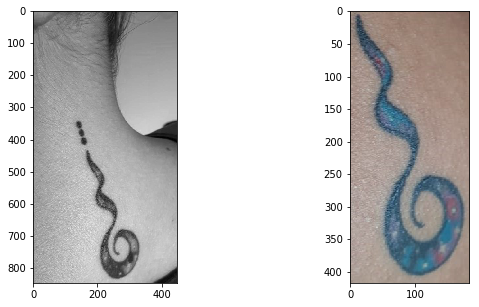

In [246]:
props = measure.regionprops(etiqueta)

areas = [r.area for r in props]
largest_ind = np.argmax(areas)

x1= props[largest_ind].bbox[0]
x2= props[largest_ind].bbox[2]
y1= props[largest_ind].bbox[1]
y2= props[largest_ind].bbox[3]


img_cut = img_orginal[x1:x2,y1:y2].copy()

#plt.imshow(img_cut, cmap='gray')
skdemo.imshow_all(img_3,img_cut)

In [247]:
io.imsave('imagenes/vannesa/v10.jpg', img_cut)

In [265]:
#Proceso para la base de datos

#Metodo que segmenta cada imagen 
def segmentacionImage(img):    
    img_1 = img.copy()
    img_1 = img_1[..., 0]
    k = morphology.square(10)
    img_median = filters.rank.median(img_1, k)
    img_min = filters.rank.minimum(img_median, k)
    
    gradiente = filters.sobel(img_min)
    imgfloat = skimage.img_as_float(gradiente)
    img_tatto = gradiente > 0.03
    return img_1,img_tatto

def showFilesSeg(array):
    f, axes = plt.subplots(ncols=4, nrows=len(array), figsize=(10, 30))   
    for i,image in enumerate(array):
        imageR,img_seg = segmentacionImage(image)       
        img_dilatada = morphology.dilation(img_seg, sq)
        
        f1 = measure.label(img_dilatada)
        imgCut = CutImage(image,f1)
        axes[i,0].axis('off')        
        axes[i,0].imshow(imageR, cmap='gray')
        axes[i,0].set_title('imagen original '+ os.path.basename(array.files[i]))  
        axes[i,1].axis('off')
        axes[i,1].imshow(img_seg, cmap='gray')
        axes[i,1].set_title('imagen segmentada '+ os.path.basename(array.files[i])) 
        axes[i,2].axis('off')
        axes[i,2].imshow(f1, cmap='jet')
        axes[i,2].set_title('imagen etiquetada '+ os.path.basename(array.files[i]))  
        axes[i,3].axis('off')
        axes[i,3].imshow(imgCut, cmap='gray')
        axes[i,3].set_title('imagen recortada '+ os.path.basename(array.files[i])) 
        
def CutImage(imgOri,img):
    props = measure.regionprops(img)
    areas = [r.area for r in props]
    largest_ind = np.argmax(areas)

    x1= props[largest_ind].bbox[0]
    x2= props[largest_ind].bbox[2]
    y1= props[largest_ind].bbox[1]
    y2= props[largest_ind].bbox[3]


    img_cut = imgOri[x1:x2,y1:y2].copy()
    return img_cut
    #plt.imshow(img_cut, cmap='gray')
    #skdemo.imshow_all(img_3,img_cut)

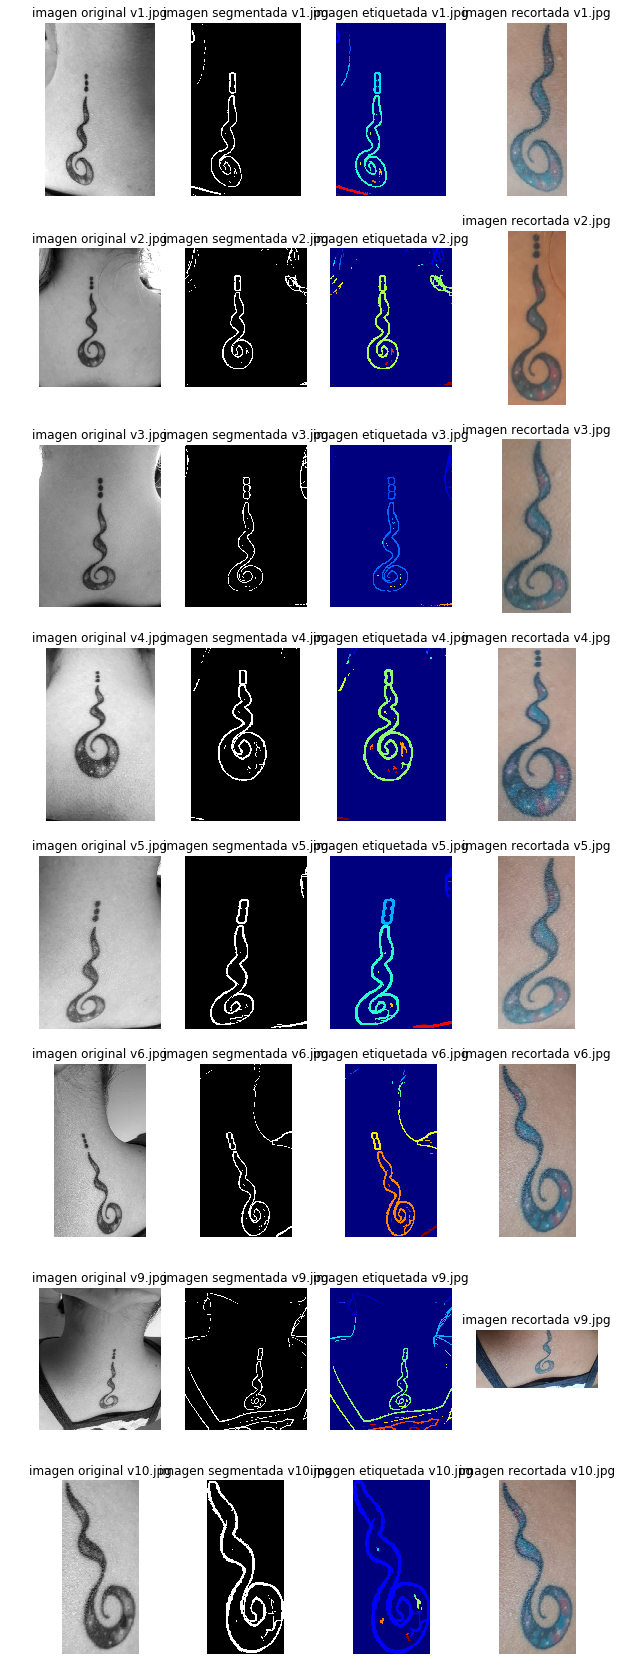

In [256]:
vannesaTattoos = io.ImageCollection('imagenes/vannesa/*.jpg')
showFilesSeg(vannesaTattoos)

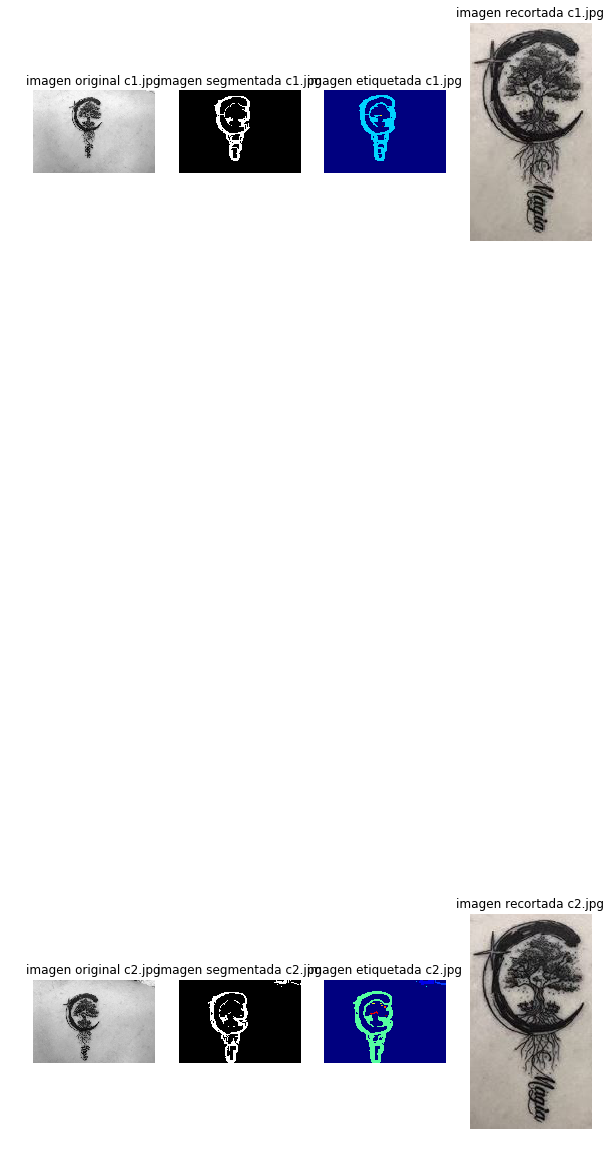

In [255]:
carmelinaTattoos = io.ImageCollection('imagenes/carmelina/*.jpg')
showFilesSeg(carmelinaTattoos)

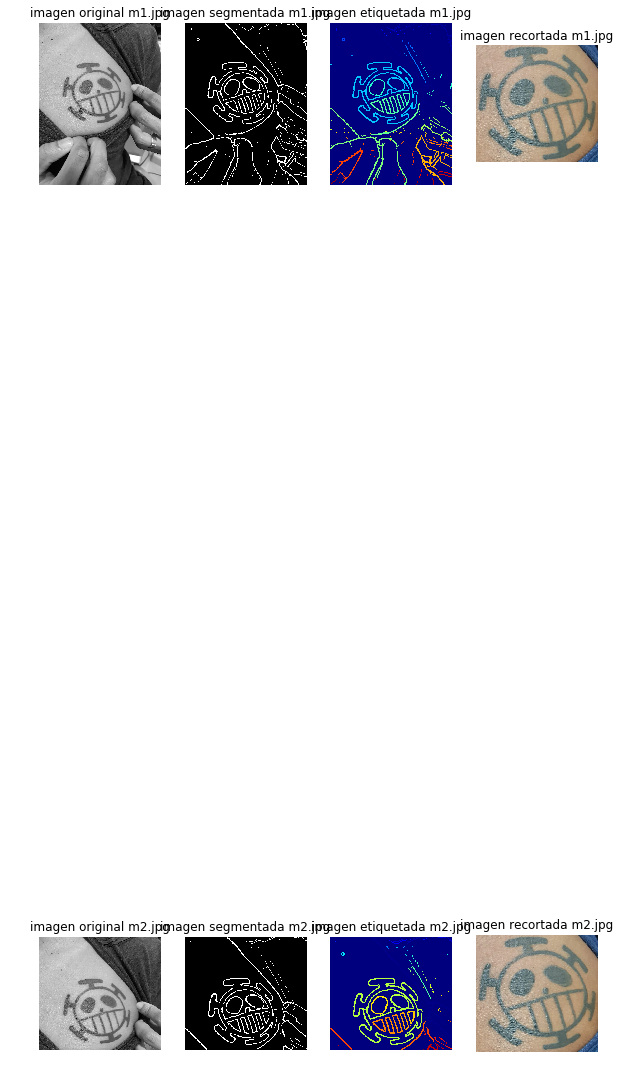

In [261]:
MenaTattoos = io.ImageCollection('imagenes/Mena/*.jpg')
showFilesSeg(MenaTattoos)

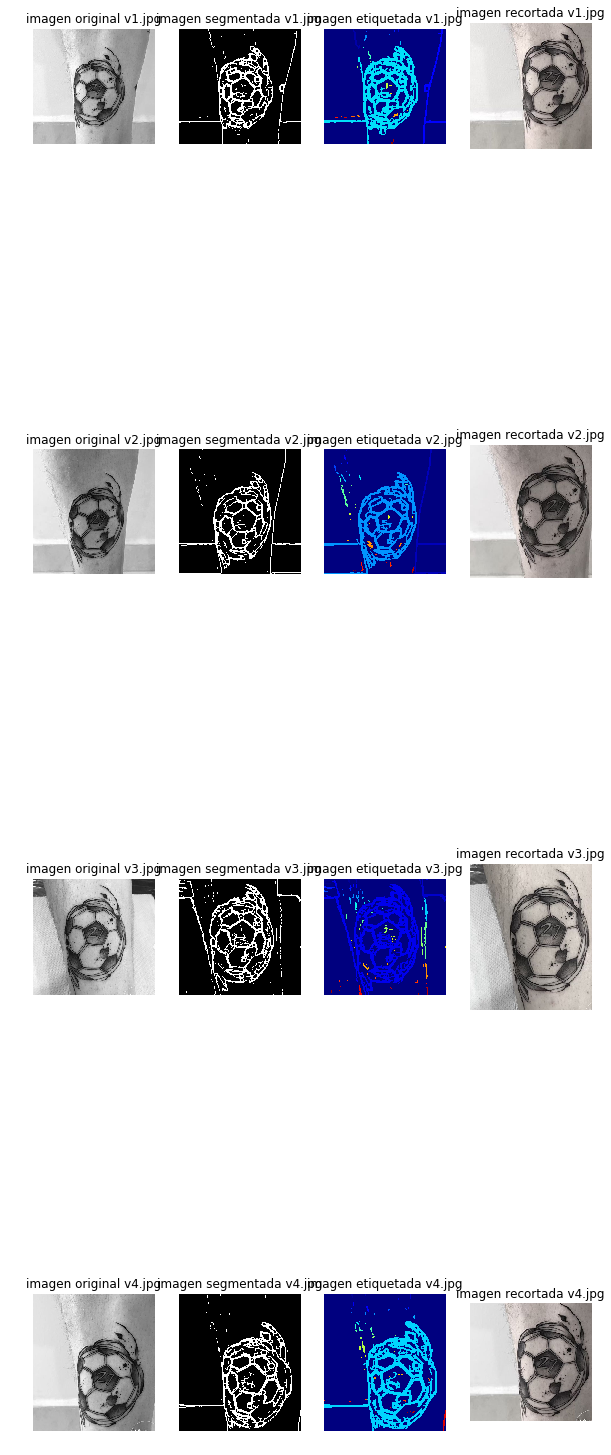

In [264]:
faustinoTattoos = io.ImageCollection('imagenes/faustino/*.jpg')
showFilesSeg(faustinoTattoos)

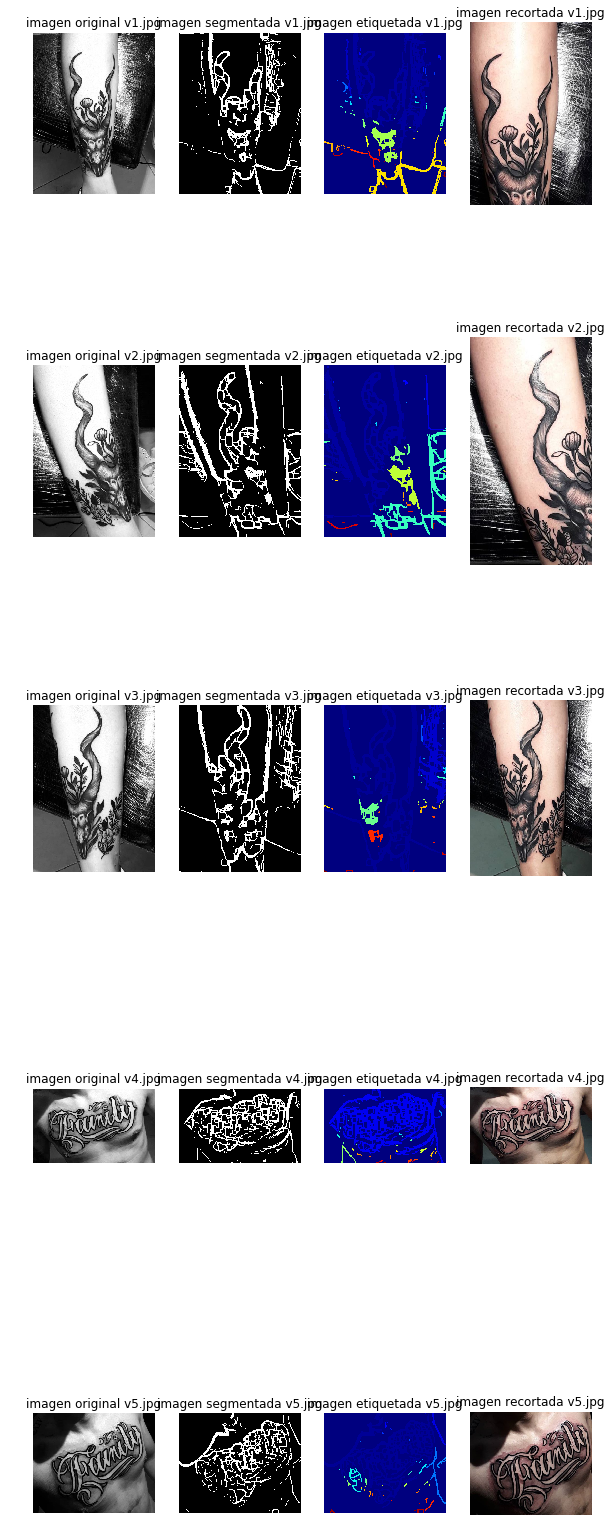

In [258]:
carlosTattoos = io.ImageCollection('imagenes/carlos/*.jpg')
showFilesSeg(carlosTattoos)